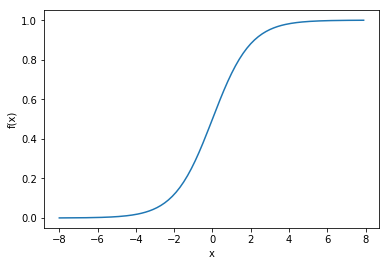

In [3]:
import matplotlib.pylab as plt
import numpy as np
x = np.arange(-8, 8, 0.1)#массив от -8 до 8 не вклчая 8 с шагом 0.1
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

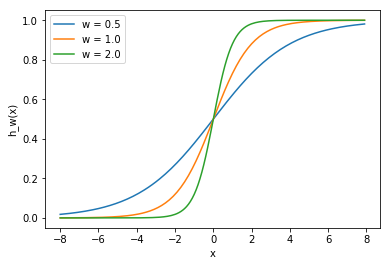

In [7]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'
for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1 / (1 + np.exp(-x * w))
    plt.plot(x, f, label = l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc = 2)
plt.show()

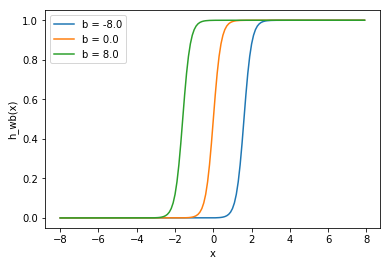

In [8]:
w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1 + np.exp(-(x * w + b)))
    plt.plot(x, f, label = l)
plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc = 2)
plt.show()

In [90]:
X = np.array([ [0,0,1],
               [0,1,1],
               [1,0,1],
               [1,1,1] ])
y = np.array([[0,0,1,1]]).T

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
print(syn0)

for j in range(10000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)
print(l2)

[[-0.81532281 -0.62747958 -0.30887855 -0.20646505]
 [ 0.07763347 -0.16161097  0.370439   -0.5910955 ]
 [ 0.75623487 -0.94522481  0.34093502 -0.1653904 ]]
[[ 0.00462783]
 [ 0.00366031]
 [ 0.99470725]
 [ 0.99427196]]


In [97]:
import numpy as np

# Сигмоида 
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# набор входных данных
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# выходные данные            
y = np.array([[0,0,1,1]]).T

# сделаем случайные числа более определёнными
np.random.seed(1)

# инициализируем веса случайным образом со средним 0
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)
for iter in range(10000):

    # прямое распространение
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # насколько мы ошиблись?
    l1_error = y - l1

    # перемножим это с наклоном сигмоиды 
    # на основе значений в l1
    l1_delta = l1_error * nonlin(l1,True) # !!!

    # обновим веса
    syn0 += np.dot(l0.T,l1_delta) # !!!

print("Выходные данные после тренировки:")
print(l1)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
Выходные данные после тренировки:
[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]


In [139]:
import numpy as np
x = np.array([[1, 0, 0]])
print(x)
y = np.array([[0]]).T
print(y)
syn0 = 2 * np.random.random((3, 1)) - 1
for it in range(10000):
    k0 = x
    k1 = np.dot(k0, syn0)
    k1 = 1 / (1 - k1)
    k1_er = y - k1
    k1_d = k1_er * 1 / (1 + np.exp(-k1))
    syn0 += np.dot(k0.T, k1_d)
print(k1)

[[1 0 0]]
[[0]]
[[ 0.00994595]]
